In [3]:
from datasets import load_dataset, concatenate_datasets

ds = load_dataset("pysentimiento/spanish-targeted-sentiment-headlines")

dataset = concatenate_datasets(list(ds.values()))

Using custom data configuration pysentimiento___spanish-targeted-sentiment-headlines-f4dfbfb5bf09500e
Reusing dataset parquet (/home/jmperez/.cache/huggingface/datasets/parquet/pysentimiento___spanish-targeted-sentiment-headlines-f4dfbfb5bf09500e/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121)
100%|██████████| 3/3 [00:00<00:00, 233.35it/s]


In [8]:
df = dataset.to_pandas()

id2label = {0: "negative", 1: "neutral", 2: "positive"}

df["label"] = df["label"].apply(lambda x: id2label[x])


In [11]:
# Aggregate by id_noticia, calculate co-ocurrence of labels

df_agg = df.groupby("id_noticia").agg({"label": lambda x: list(x)})

df_agg

,label
id_noticia,
23,[positive]
24,[positive]
31,[neutral]
39,"[positive, negative]"
75,[negative]
...,...
22608,[neutral]
22611,[positive]
22612,[positive]


In [23]:
# Create a dataframe with positive, negative, neutral columns and rows, and set them to 0
import pandas as pd

df_coocurrence = pd.DataFrame(columns=["positive", "neutral", "negative"], index=["positive", "neutral", "negative", ])
df_coocurrence = df_coocurrence.fillna(0)

for idx, row in df_agg.iterrows():
    labels = row["label"]

    for i in range(len(labels)):
        label1 = labels[i]
        for j in range(i+1, len(labels)):
            label2 = labels[j]
            df_coocurrence.loc[label1, label2] += 1
            df_coocurrence.loc[label2, label1] += 1

In [24]:
df_coocurrence

,positive,neutral,negative
positive,186,15,166
neutral,15,292,19
negative,166,19,172


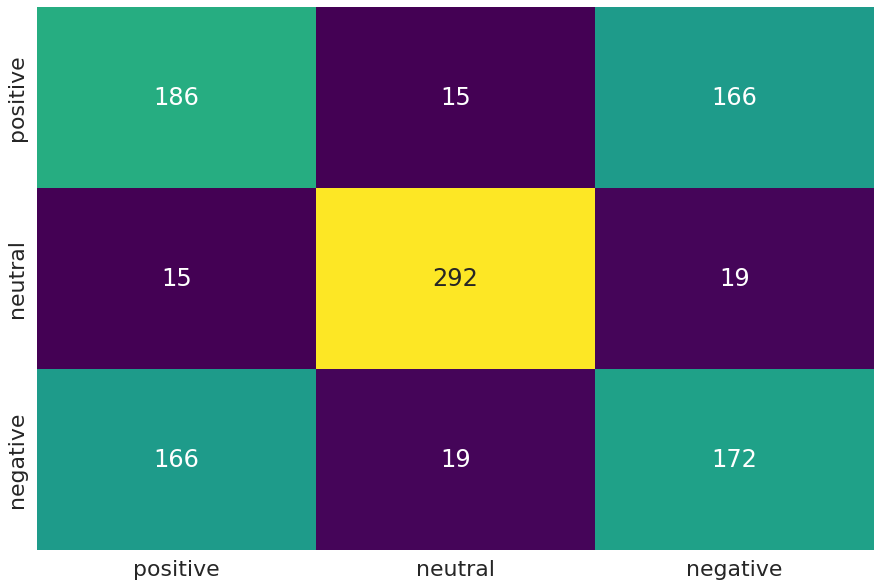

In [33]:
# Heat map of co-ocurrence
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
# Big font size
sns.set(font_scale=2)
# Don't show bar
sns.heatmap(df_coocurrence.astype(int), annot=True, fmt="d", cmap="viridis", cbar=False)

# Save as pdf
plt.savefig("co-ocurrence.pdf")

In [35]:

df["label"].value_counts()

positive    962
neutral     767
negative    710
Name: label, dtype: int64

In [39]:
pd.options.display.max_rows = 100
print(df["target"].value_counts())

Alberto Fernández                          577
Macri                                      548
Mauricio Macri                             313
Cristina Kirchner                           94
Cristina                                    86
Alberto                                     83
Lavagna                                     63
Del Caño                                    47
Cambiemos                                   46
peronismo                                   41
Roberto Lavagna                             41
Alberto F                                   38
Fernández                                   36
la izquierda                                35
Pichetto                                    30
Juntos por el Cambio                        28
Frente de Izquierda Unidad                  25
Gobierno                                    24
Frente de Izquierda                         23
kirchnerismo                                20
Nicolás del Caño                            19
Miguel Ángel 